In [107]:
import sys
sys.path.append('../')
from pyACC.sampler import MCMC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [108]:
my_fun = sp.stats.skewnorm(a=5, loc=3, scale=2).pdf
print(type(my_fun))

<class 'method'>


In [109]:
sample = MCMC.metropolis_hastings(0, my_fun, 2.5, 100000)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

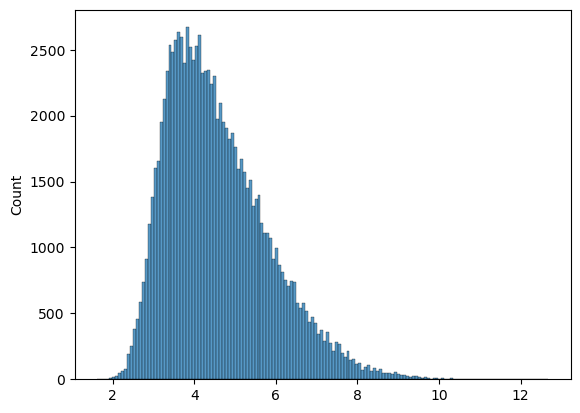

In [110]:
sns.histplot(sample)

### multivariate case

In [111]:
mean = np.array([1,3])
cov = np.matrix([[2,3],[3,8]])

multivar_pdf = sp.stats.multivariate_normal(mean=mean, cov=cov).pdf
print(type(multivar_pdf))

<class 'method'>


In [112]:
multivar_sample = MCMC.metropolis_hastings_multivariate(mean, multivar_pdf, np.matrix([[1,0.3],[0.4, 3]]), 10000)

/Users/edoardo/AstroCosmoComputational/Students/MaraglianoEdo/Lession7/../pyACC/sampler/MCMC.py:60: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  prop_val = np.random.multivariate_normal(mean=current_val, cov=proposal_covariance)


##### visualization with seaborn

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


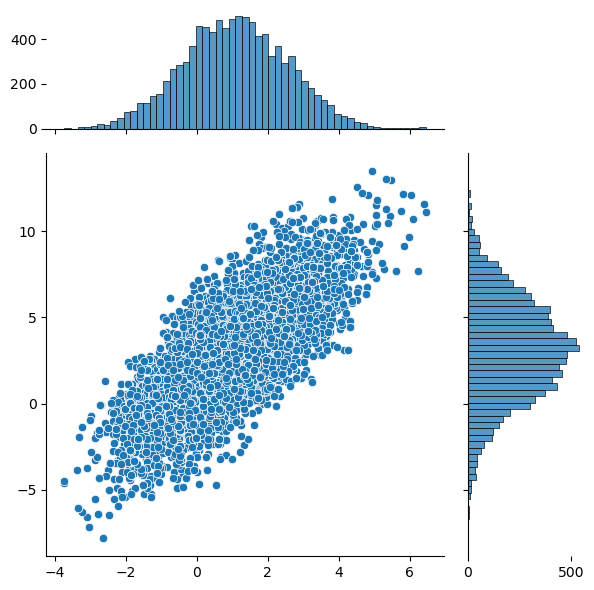

In [113]:

# Create a JointGrid with scatterplot and histograms on the sides
g = sns.JointGrid(x=multivar_sample[:, 0], y=multivar_sample[:, 1], ratio=3)

g.plot(sns.scatterplot, sns.histplot)
g.ax_marg_x.yaxis.tick_left()
g.ax_marg_x.yaxis.set_label_position("left")

g.ax_marg_y.xaxis.tick_bottom()
g.ax_marg_y.xaxis.set_label_position("bottom")



##### visualization with matplotlib

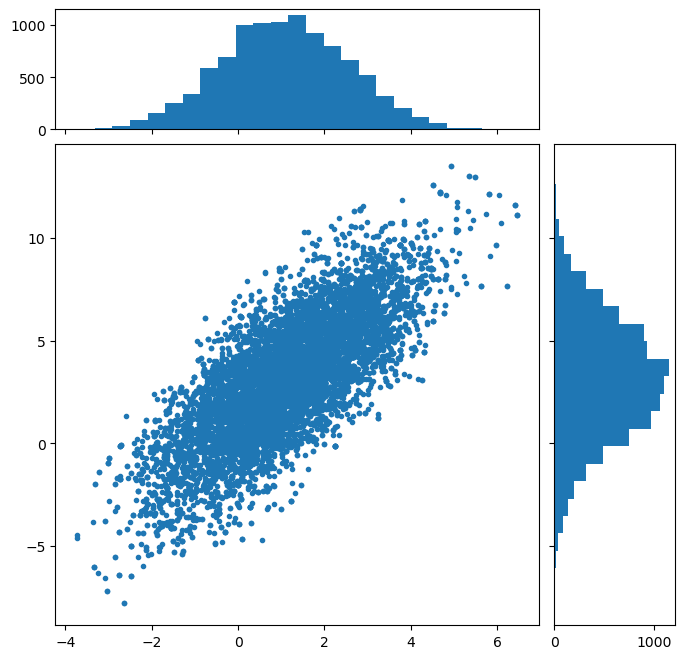

In [114]:
# Create a figure and grid layout
fig, axs = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'width_ratios': [4, 1], 'height_ratios': [1, 4],
                                                          'hspace': 0.05, 'wspace': 0.05})

# Scatter plot
axs[1, 0].scatter(multivar_sample[:, 0], multivar_sample[:, 1], marker='.')

# Top histogram
axs[0, 0].hist(multivar_sample[:, 0], bins=25)

# Right histogram
axs[1, 1].hist(multivar_sample[:, 1], bins=25, orientation='horizontal')

# Remove x-axis and y-axis labels from histograms
axs[0, 0].tick_params(labelbottom=False)
axs[1, 1].tick_params(labelleft=False)
axs[0, 1].axis('off')

plt.show()